In [37]:
# importing the libraries needed in this project

import pandas as pd
import numpy as np
import seaborn as sns
import time
from sklearn import svm

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [39]:
import sklearn.metrics

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import SGDClassifier

In [40]:
# Data Preparation Stage

# Loading the data into a dataframe
data = pd.read_csv('data.csv')
print('Dimension of the dataset : ', data.shape)
print(data.head())


Dimension of the dataset :  (569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_

In [41]:

# Removing the empty column from the dataset
del data['Unnamed: 32']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [42]:
# Separating the feature variables and class variable(target variable)

X = data.iloc[:, 2:].values       # Feature variable
Y = data.iloc[:, 1].values        # Actual class label
print(type(Y))
print("\n Actual Class Labels : ", Y)

<class 'numpy.ndarray'>

 Actual Class Labels :  ['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 '

In [43]:
# Class Label encoding M & B to 1 & 0
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
print('After Encoding : ', Y)

After Encoding :  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 

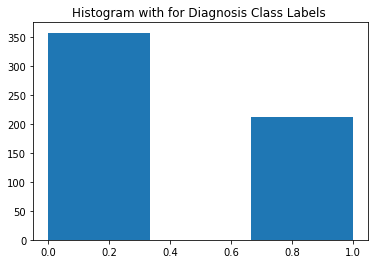

In [44]:
plt.hist(Y, bins=3)  # arguments are passed to np.histogram
plt.title("Histogram with for Diagnosis Class Labels ")
plt.show()

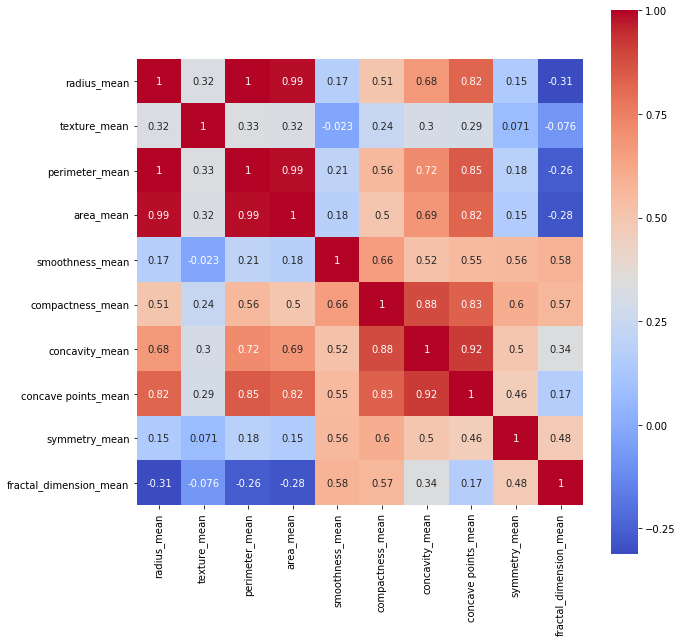

In [45]:
mean_columns = list(data.columns[2:12])
mean_columns

plt.figure(figsize=(10, 10))
sns.heatmap(data[mean_columns].corr(), annot = True, square = True, cmap ='coolwarm' )
plt.savefig('correlation')
plt.show()

In [46]:
# Splitting data into test and training sets and randomly selecting in order to bias
# (sometimes they are highly correlated data)

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.3, random_state= 0)
# Scaling our training data (feature scaling)
# Each feature in our dataset now will have a mean = 0 and standard deviation = 1

sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1 = sc.fit_transform(X_test1)


In [47]:
# Model Building
# 1. Stochastic Gradient Descent (SGD)
# 2. Support Vector Machines (SVM- Linear Kernel)
# 3. Support Vector Machines (SVM- Gaussian Kernel)



c:\users\ebhavaniprasad\pycharmprojects\test\venv\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


TP 59 FP 8 FN 4 TN 100
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       108
           1       0.88      0.94      0.91        63

   micro avg       0.93      0.93      0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

Accuracy of Stochastic Gradient classifier on test set: 92.98

[[100   8]
 [  4  59]]
Time took for training and predicting the results 0.0 in seconds

Recall  0.9365079365079365
F1- Score   0.9076923076923077


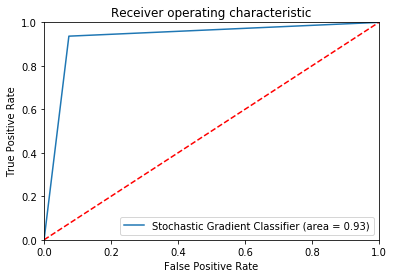

Area Under the Curve  0.9312169312169313


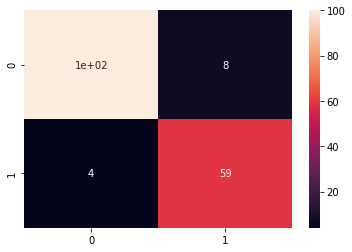

In [48]:
def StochasticGradient(train, label, test, label_test):
    
    start = time.time()
    
    model = SGDClassifier()
    model.fit(train, label)
    
    pred = model.predict(test) 
    
    
    end = time.time()
    
    confusion_mat = confusion_matrix(label_test, pred)
    def get_confusion_matrix_values2(label_test, pred):
        cm = confusion_matrix(label_test,  pred)
        return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

    TN1, FP1, FN1, TP1 = get_confusion_matrix_values2(label_test, pred)
    
    denom1 = TP1 + FP1

    print('TP', TP1, 'FP', FP1, 'FN', FN1, 'TN', TN1)
    print(classification_report(label_test, pred))
    
    print('Accuracy of Stochastic Gradient classifier on test set: {:.2f}\n'.format(float(confusion_mat[0,0]+confusion_mat[1,1])*100/confusion_mat.sum()))
    print(confusion_mat)
    
    
    print('Time took for training and predicting the results {0:.5} in seconds\n'.format(float(end-start)))
   
    recall = float(confusion_mat[1, 1]/(confusion_mat[1,1]+confusion_mat[1,0]))
    prec  = float(confusion_mat[1, 1]/(confusion_mat[1,1]+confusion_mat[0,1]))

    f_score = (2*recall*prec)/(recall + prec)

    # print('real prec', prec)


    print('Recall ', recall)

    print('F1- Score  ', f_score)

    roc_auc4 = roc_auc_score(label_test, pred)
    
    fpr4, tpr4, thresholds4 = roc_curve(label_test, pred)
    plt.figure()
    plt.plot(fpr4, tpr4, label='Stochastic Gradient Classifier (area = %0.2f)' % roc_auc4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()

    print('Area Under the Curve ', roc_auc4)
    sns.heatmap(confusion_mat, annot=True)
    plt.savefig('SGD.png')
    plt.show()




StochasticGradient(X_train1, Y_train1, X_test1, Y_test1)


TP 62 FP 5 FN 1 TN 103
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       108
           1       0.93      0.98      0.95        63

   micro avg       0.96      0.96      0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy of Support vector Machines classifier on test set: 96.49

[[103   5]
 [  1  62]]
Time took for training and predicting the results 0.01562 in seconds

Recall  0.9841269841269841
F1- Score   0.9538461538461538


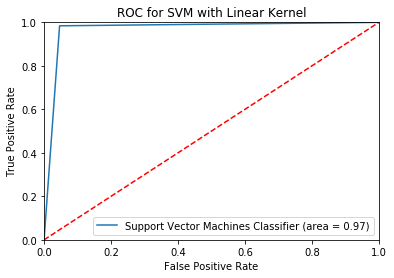

Area Under the Curve  0.968915343915344


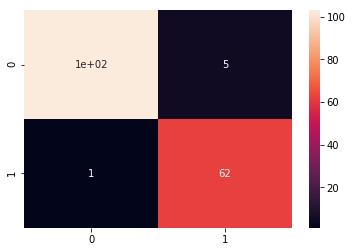

In [49]:
def SupportVectorMachines(train, label, test, label_test):
    start = time.time()
    
    model1 = svm.SVC(kernel = 'linear', C = 0.3)
    model1.fit(train, label)
    
    pred1 = model1.predict(test) 
    
    
    end = time.time()
    
    confusion_mat1 = confusion_matrix(label_test, pred1)
    def get_confusion_matrix_values2(label_test, pred1):
        cm1 = confusion_matrix(label_test,  pred1)
        return(cm1[0][0], cm1[0][1], cm1[1][0], cm1[1][1])

    TN1, FP1, FN1, TP1 = get_confusion_matrix_values2(label_test, pred1)
    
    denom1 = TP1 + FP1

    print('TP', TP1, 'FP', FP1, 'FN', FN1, 'TN', TN1)
    print(classification_report(label_test, pred1))
    
    print('Accuracy of Support vector Machines classifier on test set: {:.2f}\n'.format(float(confusion_mat1[0,0]+confusion_mat1[1,1])*100/confusion_mat1.sum()))
    print(confusion_mat1)
    
    
    print('Time took for training and predicting the results {0:.5} in seconds\n'.format(float(end-start)))
   
    recall1 = float(confusion_mat1[1, 1]/(confusion_mat1[1,1]+confusion_mat1[1,0]))
    prec1  = float(confusion_mat1[1, 1]/(confusion_mat1[1,1]+confusion_mat1[0,1]))

    f_score1 = (2*recall1*prec1)/(recall1 + prec1)

    # print('real prec', prec)


    print('Recall ', recall1)

    print('F1- Score  ', f_score1)

    roc_auc4 = roc_auc_score(label_test, pred1)
    
    fpr4, tpr4, thresholds4 = roc_curve(label_test, pred1)
    plt.figure()
    plt.plot(fpr4, tpr4, label='Support Vector Machines Classifier (area = %0.2f)' % roc_auc4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for SVM with Linear Kernel')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC_SVM')
    plt.show()

    print('Area Under the Curve ', roc_auc4)
    sns.heatmap(confusion_mat1, annot=True)
    plt.savefig('SVM.png')
    plt.show()


SupportVectorMachines(X_train1, Y_train1, X_test1, Y_test1)
   
    
    
    

TP 59 FP 0 FN 4 TN 108
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       108
           1       1.00      0.94      0.97        63

   micro avg       0.98      0.98      0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy of Support vector Machines classifier on test set: 97.66

[[108   0]
 [  4  59]]
Time took for training and predicting the results 0.0 in seconds

Recall  0.9365079365079365
F1- Score   0.9672131147540983


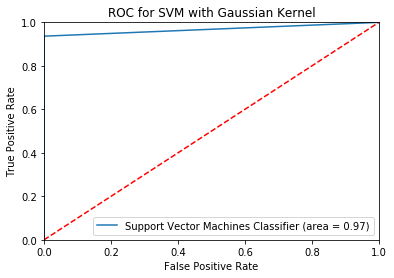

Area Under the Curve for Gaussian Kernel  0.9682539682539683


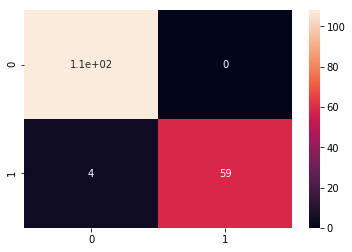

In [50]:
def SupportVectorMachines1(train, label, test, label_test):
    start = time.time()
    
    model1 = svm.SVC(kernel = 'rbf',  C = 0.3, gamma = 0.02)
    model1.fit(train, label)
    
    pred1 = model1.predict(test) 
    
    
    end = time.time()
    
    confusion_mat1 = confusion_matrix(label_test, pred1)
    def get_confusion_matrix_values2(label_test, pred1):
        cm1 = confusion_matrix(label_test,  pred1)
        return(cm1[0][0], cm1[0][1], cm1[1][0], cm1[1][1])

    TN1, FP1, FN1, TP1 = get_confusion_matrix_values2(label_test, pred1)
    
    denom1 = TP1 + FP1

    print('TP', TP1, 'FP', FP1, 'FN', FN1, 'TN', TN1)
    print(classification_report(label_test, pred1))
    
    print('Accuracy of Support vector Machines classifier on test set: {:.2f}\n'.format(float(confusion_mat1[0,0]+confusion_mat1[1,1])*100/confusion_mat1.sum()))
    print(confusion_mat1)
    
    
    print('Time took for training and predicting the results {0:.5} in seconds\n'.format(float(end-start)))
   
    recall1 = float(confusion_mat1[1, 1]/(confusion_mat1[1,1]+confusion_mat1[1,0]))
    prec1  = float(confusion_mat1[1, 1]/(confusion_mat1[1,1]+confusion_mat1[0,1]))

    f_score1 = (2*recall1*prec1)/(recall1 + prec1)

    # print('real prec', prec)


    print('Recall ', recall1)

    print('F1- Score  ', f_score1)

    roc_auc4 = roc_auc_score(label_test, pred1)
    
    fpr4, tpr4, thresholds4 = roc_curve(label_test, pred1)
    plt.figure()
    plt.plot(fpr4, tpr4, label='Support Vector Machines Classifier (area = %0.2f)' % roc_auc4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for SVM with Gaussian Kernel')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC_SVM_gaussian')
    plt.show()

    print('Area Under the Curve for Gaussian Kernel ', roc_auc4)
    sns.heatmap(confusion_mat1, annot=True)
    plt.savefig('SVM_gaussian.png')
    plt.show()


SupportVectorMachines1(X_train1, Y_train1, X_test1, Y_test1)
   
    
    
    